In [36]:
import xarray as xr
import matplotlib.pyplot as plt

In [66]:
member = "mri-esm2-0_r1i1p1f1"
data_ssp126 = xr.open_dataset(f"/home/ostronet/kurser/see110/sim_outputs/output_ssp126_{member}",engine="netcdf4")
data_ssp370 = xr.open_dataset(f"/home/ostronet/kurser/see110/sim_outputs/output_ssp370_{member}",engine="netcdf4")
data_ssp585 = xr.open_dataset(f"/home/ostronet/kurser/see110/sim_outputs/output_ssp585_{member}",engine="netcdf4")

In [67]:
fnsize_title = 16
fnsize_label = 14

In [68]:
monthly_melt = data_ssp126["melt_on_glacier_monthly"].sum(dim="rgi_id")

In [69]:
#Årlig plot
total_runoff_ssp126 = 1e-9*(data_ssp126["melt_off_glacier"].sum(dim="rgi_id") + data_ssp126["melt_on_glacier"].sum(dim="rgi_id") + data_ssp126["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp126["liq_prcp_on_glacier"].sum(dim="rgi_id"))
total_runoff_ssp370 = 1e-9*(data_ssp370["melt_off_glacier"].sum(dim="rgi_id") + data_ssp370["melt_on_glacier"].sum(dim="rgi_id") + data_ssp370["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp370["liq_prcp_on_glacier"].sum(dim="rgi_id"))
total_runoff_ssp585 = 1e-9*(data_ssp585["melt_off_glacier"].sum(dim="rgi_id") + data_ssp585["melt_on_glacier"].sum(dim="rgi_id") + data_ssp585["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp585["liq_prcp_on_glacier"].sum(dim="rgi_id"))



total_runoff_ssp126 = total_runoff_ssp126[:-1].rolling(time=10).mean()
total_runoff_ssp370 = total_runoff_ssp370[:-1].rolling(time=10).mean()
total_runoff_ssp585 = total_runoff_ssp585[:-1].rolling(time=10).mean()




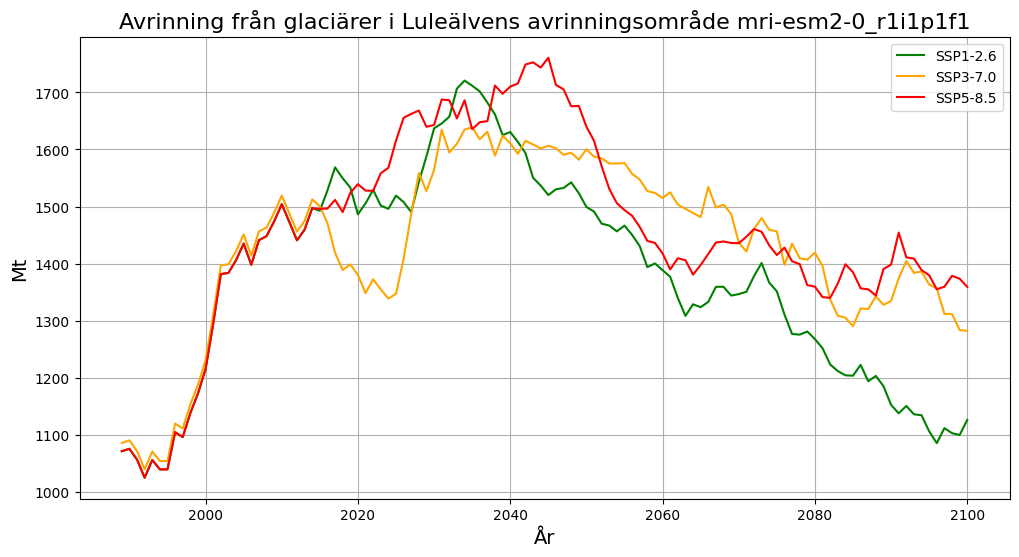

In [70]:
fig, ax = plt.subplots(figsize=(12,6))
total_runoff_ssp126.plot(ax=ax, color="g",label="SSP1-2.6")
total_runoff_ssp370.plot(ax=ax,color="orange",label="SSP3-7.0")
total_runoff_ssp585.plot(ax=ax,color="r",label="SSP5-8.5")

plt.title(f"Avrinning från glaciärer i Luleälvens avrinningsområde {member}",fontsize=fnsize_title); plt.ylabel("Mt",fontsize=fnsize_label); plt.xlabel("År",fontsize=fnsize_label)
plt.legend(); plt.grid()
plt.savefig(f"total_avrinning_alla_scenarion_{member}")
plt.show()

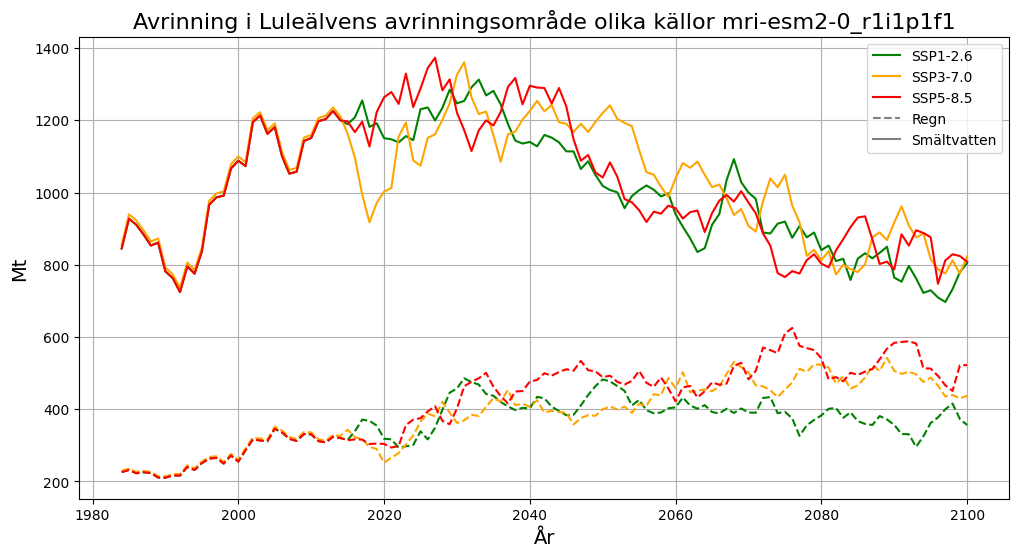

In [71]:
runoff_regn_ssp585 = 1e-9*(data_ssp585["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp585["liq_prcp_on_glacier"].sum(dim="rgi_id"))
runoff_melt_ssp585 = 1e-9*(data_ssp585["melt_off_glacier"].sum(dim="rgi_id") + data_ssp585["melt_on_glacier"].sum(dim="rgi_id"))

runoff_regn_ssp370 = 1e-9*(data_ssp370["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp370["liq_prcp_on_glacier"].sum(dim="rgi_id"))
runoff_melt_ssp370 = 1e-9*(data_ssp370["melt_off_glacier"].sum(dim="rgi_id") + data_ssp370["melt_on_glacier"].sum(dim="rgi_id"))

runoff_regn_ssp126 = 1e-9*(data_ssp126["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp126["liq_prcp_on_glacier"].sum(dim="rgi_id"))
runoff_melt_ssp126 = 1e-9*(data_ssp126["melt_off_glacier"].sum(dim="rgi_id") + data_ssp126["melt_on_glacier"].sum(dim="rgi_id"))

runoff_melt_ssp126 = runoff_melt_ssp126[:-1].rolling(time=5).mean()
runoff_regn_ssp126 = runoff_regn_ssp126[:-1].rolling(time=5).mean()

runoff_melt_ssp370 = runoff_melt_ssp370[:-1].rolling(time=5).mean()
runoff_regn_ssp370 = runoff_regn_ssp370[:-1].rolling(time=5).mean()

runoff_melt_ssp585 = runoff_melt_ssp585[:-1].rolling(time=5).mean()
runoff_regn_ssp585 = runoff_regn_ssp585[:-1].rolling(time=5).mean()


fig, ax = plt.subplots(figsize=(12,6))
runoff_regn_ssp126.plot(ax=ax, color="g",linestyle="--",label=None)
runoff_melt_ssp126.plot(ax=ax, label= "SSP1-2.6", color = "g")

runoff_regn_ssp370.plot(ax=ax, color="orange",linestyle="--")
runoff_melt_ssp370.plot(ax=ax, label= "SSP3-7.0", color="orange")

runoff_regn_ssp585.plot(ax=ax,color="r",linestyle="--")
runoff_melt_ssp585.plot(ax=ax, label= "SSP5-8.5",color="r")

plt.plot([],[], color= "gray", linestyle = "--", label="Regn")
plt.plot([],[], color= "gray", label="Smältvatten")


plt.legend(); plt.grid(); plt.title(f"Avrinning i Luleälvens avrinningsområde olika källor {member}",fontsize=fnsize_title); plt.ylabel("Mt",fontsize=fnsize_label); plt.xlabel("År",fontsize=fnsize_label)
plt.savefig(f"Jämförelse regn och smält {member}")
plt.show()

In [72]:
volume_ssp126 =1e-9 * data_ssp126["volume"].sum(dim="rgi_id")
volume_ssp370 = 1e-9 *data_ssp370["volume"].sum(dim="rgi_id")
volume_ssp585 = 1e-9 *data_ssp585["volume"].sum(dim="rgi_id")

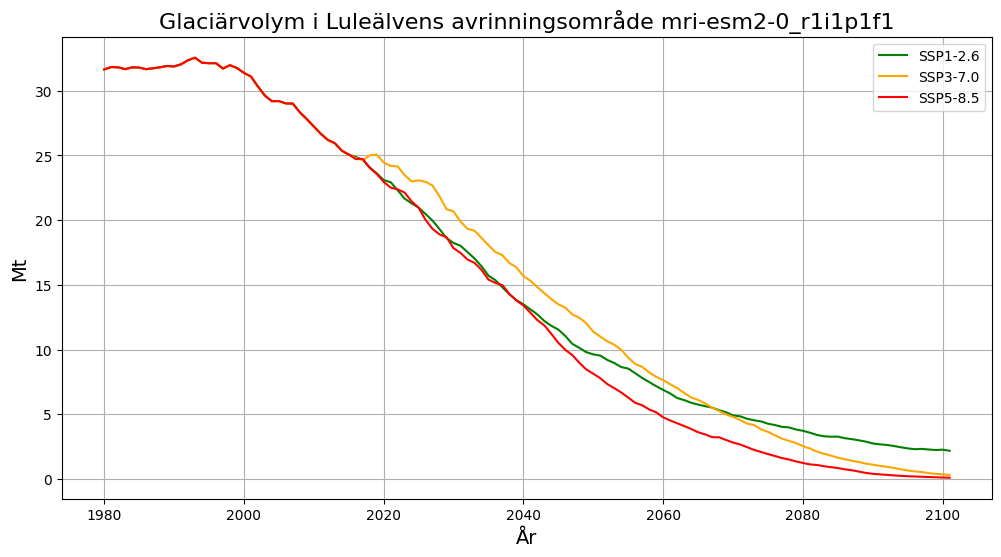

In [73]:
fig, ax = plt.subplots(figsize=(12,6))
volume_ssp126.plot(ax=ax, color= "g", label="SSP1-2.6")
volume_ssp370.plot(ax=ax, color= "orange", label="SSP3-7.0")
volume_ssp585.plot(ax=ax, color= "r", label="SSP5-8.5")

plt.legend(); plt.grid(); plt.title(f"Glaciärvolym i Luleälvens avrinningsområde {member}",fontsize=fnsize_title); plt.ylabel("Mt",fontsize=fnsize_label); plt.xlabel("År",fontsize=fnsize_label)
plt.savefig(f"volymplot {member}")
plt.show()